In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import EngFormatter


In [2]:
#Loading the dataset
cars_df = pd.read_csv('Project.csv')

In [3]:
#Counting the number of nulls per column
cars_df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
#Displaying the first 5 rows
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600
1,BMW,i3,2015,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
2,BMW,i3,2016,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
3,BMW,i3,2017,electric,170.0,0.0,DIRECT_DRIVE,rear wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400
4,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905


In [5]:
#Filling the null values with values from the interned
cars_df['Engine Fuel Type'].fillna('regular unleaded',inplace=True)

/var/folders/74/07sh7_g547lgfrnkknv9wdmw0000gn/T/ipykernel_20595/3552073430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Engine Fuel Type'].fillna('regular unleaded',inplace=True)


In [6]:
#Filling the null values with values 0 for electric cars and cars with rotary engines as they have no cyliders 
cars_df['Engine Cylinders'].fillna(0,inplace=True)

/var/folders/74/07sh7_g547lgfrnkknv9wdmw0000gn/T/ipykernel_20595/2235802174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Engine Cylinders'].fillna(0,inplace=True)


In [7]:
#Filling the null values with values from the internet
cars_df.loc[(cars_df['Make'] == 'FIAT') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 111
cars_df.loc[(cars_df['Make'] == 'Lincoln') & (cars_df['Model'] == 'Continental') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 305
cars_df.loc[(cars_df['Make'] == 'Ford') & (cars_df['Model'] == 'Escape') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 168
cars_df.loc[(cars_df['Make'] == 'Honda') & (cars_df['Year'] == 2013) & (cars_df['Engine HP'].isna()), 'Engine HP'] = 100
cars_df.loc[(cars_df['Make'] == 'Honda') & (cars_df['Year'] == 2014) & (cars_df['Engine HP'].isna()), 'Engine HP'] = 123
cars_df.loc[(cars_df['Make'] == 'Ford') & (cars_df['Model'] == 'Focus') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 143
cars_df.loc[(cars_df['Make'] == 'Ford') & (cars_df['Model'] == 'Freestar') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 193
cars_df.loc[(cars_df['Make'] == 'Mitsubishi') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 67
cars_df.loc[(cars_df['Make'] == 'Chevrolet') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 260
cars_df.loc[(cars_df['Make'] == 'Nissan') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 107
cars_df.loc[(cars_df['Make'] == 'Mercedes-Benz') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 200
cars_df.loc[(cars_df['Make'] == 'Lincoln') & (cars_df['Model'] == 'MKZ') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 245
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2016) & (cars_df['Market Category'] == 'Exotic,High-Performance') & (cars_df['Driven_Wheels'] == 'all wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 532
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2016) & (cars_df['Market Category'] == 'Exotic,Performance') & (cars_df['Driven_Wheels'] == 'all wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 328
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2016) & (cars_df['Market Category'] == 'Exotic,Performance') & (cars_df['Driven_Wheels'] == 'rear wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 315
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2015) & (cars_df['Market Category'] == 'Exotic,Performance') & (cars_df['Driven_Wheels'] == 'rear wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 362
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2015) & (cars_df['Market Category'] == 'Exotic,High-Performance') & (cars_df['Driven_Wheels'] == 'all wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 691
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2015) & (cars_df['Market Category'] == 'Exotic,Performance') & (cars_df['Driven_Wheels'] == 'all wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 518
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2014) & (cars_df['Market Category'] == 'Exotic,Performance') & (cars_df['Driven_Wheels'] == 'rear wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 302
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2014) & (cars_df['Market Category'] == 'Exotic,High-Performance') & (cars_df['Driven_Wheels'] == 'rear wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 416
cars_df.loc[(cars_df['Make'] == 'Tesla') & (cars_df['Year'] == 2014) & (cars_df['Market Category'] == 'Exotic,High-Performance') & (cars_df['Driven_Wheels'] == 'all wheel drive') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 691
cars_df.loc[(cars_df['Make'] == 'Toyota') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 154
cars_df.loc[(cars_df['Make'] == 'Kia') & (cars_df['Engine HP'].isna()), 'Engine HP'] = 109

In [8]:
cars_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
#Converting data types
cars_df['Engine HP'] = cars_df['Engine HP'].astype('Int64')
cars_df['Engine Cylinders'] = cars_df['Engine Cylinders'].astype('Int64')
cars_df['Number of Doors'] = cars_df['Number of Doors'].astype('Int64')

In [10]:
cars_df.dtypes

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
Engine HP             Int64
Engine Cylinders      Int64
Transmission Type    object
Driven_Wheels        object
Number of Doors       Int64
Market Category      object
Vehicle Size         object
Vehicle Style        object
highway MPG           int64
city mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

In [11]:
#Counting the duplicated rows
cars_df.duplicated().sum()

np.int64(715)

In [12]:
#Counting number of rows for orginal dataset
len(cars_df)

11914

In [13]:
#Dropping the null values
cars_df.drop_duplicates(inplace=True)

In [14]:
#Counting number of rows after dropping duplicated rows
len(cars_df)

11199

In [15]:
#Correcting the value of the highway Fuel Efficiency for car in index 0
cars_df.loc[0,['highway Fuel Efficiency']] = 34

In [16]:
#Categorizing cars by price, any car with price over 100k $ is considered as a luxury car
def luxery(a):
    if a > 100000:
        return True
    else:
        return False

In [17]:
#applying the luxury function on a new column
cars_df['Luxury'] =cars_df['MSRP'].apply(luxery)

In [18]:
#checking the new column
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,highway Fuel Efficiency,Luxury
0,Audi,A6,2017,premium unleaded (recommended),252,4,AUTOMATED_MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,354,24,3105,51600,34.0,False
1,BMW,i3,2015,electric,170,0,DIRECT_DRIVE,rear wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,NaN,False
2,BMW,i3,2016,electric,170,0,DIRECT_DRIVE,rear wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,NaN,False
3,BMW,i3,2017,electric,170,0,DIRECT_DRIVE,rear wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,111,137,3916,42400,NaN,False
4,Chevrolet,Bolt EV,2017,electric,200,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,40905,NaN,False


In [19]:
#Creating a new column for the average fuel efficiency, the average of both highway and city
cars_df ['Fuel Efficiency'] = (cars_df['highway MPG'] + cars_df['city mpg']) / 2

In [20]:
#Changing column names into better names
cars_df = cars_df.rename(columns={'MPG': 'Fuel Efficiency','MSRP': 'Price'})

In [21]:
#Filling null values with an empty str to apply the function on the column
cars_df['Market Category'].fillna('',inplace=True)

/var/folders/74/07sh7_g547lgfrnkknv9wdmw0000gn/T/ipykernel_20595/2699196341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Market Category'].fillna('',inplace=True)


In [ ]:
#Categorizing cars into electric and non electric.
def electric(row):
    if ('electric' in row['Engine Fuel Type']) | ('Hybrid' in  row['Market Category']) :
        return 'Electric'
    else:
        return 'Non-Electric'


In [ ]:
#Applying the function on a new column called Fuel Type
cars_df['Fuel Type'] = cars_df.apply(electric, axis = 1)

In [ ]:
#Counting the number of electric cars
len(cars_df[cars_df['Fuel Type'] == 'Electric'])

403

In [ ]:
#Calculating the fuel effeciency for electric vs non-elecreic cars
pd.DataFrame(cars_df['Fuel Efficiency'].groupby(cars_df['Fuel Type']).mean().sort_values())

,Fuel Efficiency
Fuel Type,
Non-Electric,22.300760
Electric,46.490074


In [ ]:
#Calculating the fuel effeciency for electric vs non-elecreic cars (Luxury cars only)
pd.DataFrame(cars_df[cars_df['Luxury'] == True].groupby('Fuel Type')['Fuel Efficiency'].mean().sort_values())

,Fuel Efficiency
Fuel Type,
Non-Electric,16.282853
Electric,57.750000


In [ ]:
#Craeting a new DF for the heatmap and dropping usless columns.
cars_df1= cars_df.drop(columns = {'Number of Doors','highway MPG','city mpg','Luxury','Popularity','highway Fuel Efficiency'})

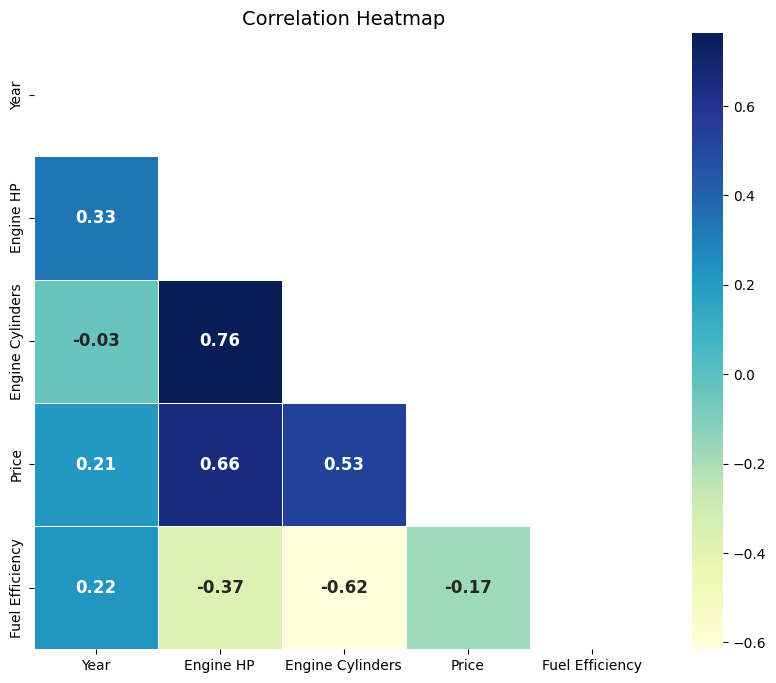

In [82]:
# Correlation heatmap
corr = cars_df1.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    mask=mask, 
    fmt=".2f", 
    cmap="YlGnBu", 
    annot=True, 
    linewidths=0.5,
    annot_kws={"size": 12, "weight": "bold"}  # <-- Increase font size and make bold
)

plt.title("Correlation Heatmap", fontsize=14)

# Remove backgrounds
ax.set_facecolor('none')            # axes transparent
ax.figure.set_facecolor('none')     # figure transparent

# Remove chart outline/spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


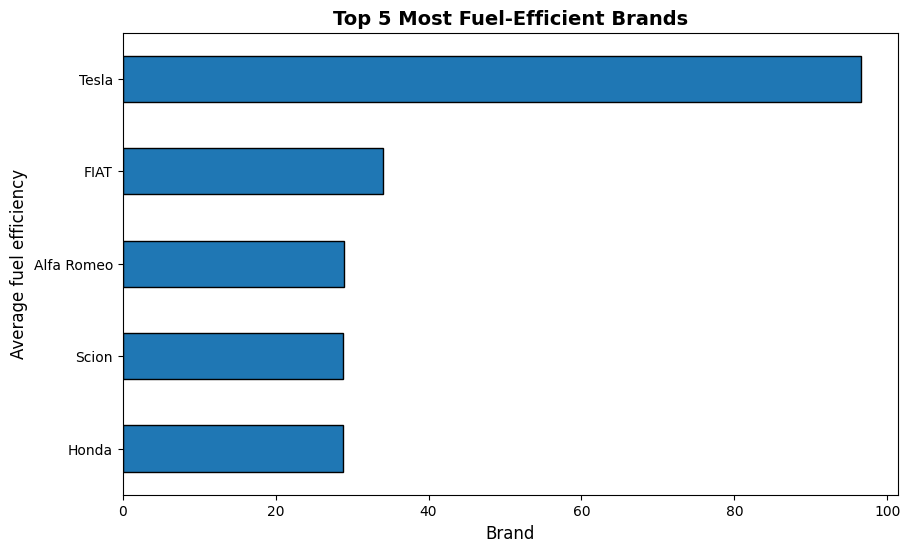

In [33]:
#Top 5 manufacturers by fuel efficiency
fuel_efficient = cars_df.groupby('Make')[['Fuel Efficiency']].mean().sort_values(by = 'Fuel Efficiency', ascending = True).tail(5)
ax = fuel_efficient.plot(kind='barh', figsize=(10,6), color=['#1F77B4'], edgecolor='black', legend=False)
plt.title('Top 5 Most Fuel-Efficient Brands', fontsize=14, fontweight='bold')
plt.ylabel('Average fuel efficiency', fontsize=12)
plt.xlabel('Brand', fontsize=12)
ax.set_facecolor('none')           # Make the axes background transparent
ax.figure.set_facecolor('none')    # Make the figure background transparent
plt.show()

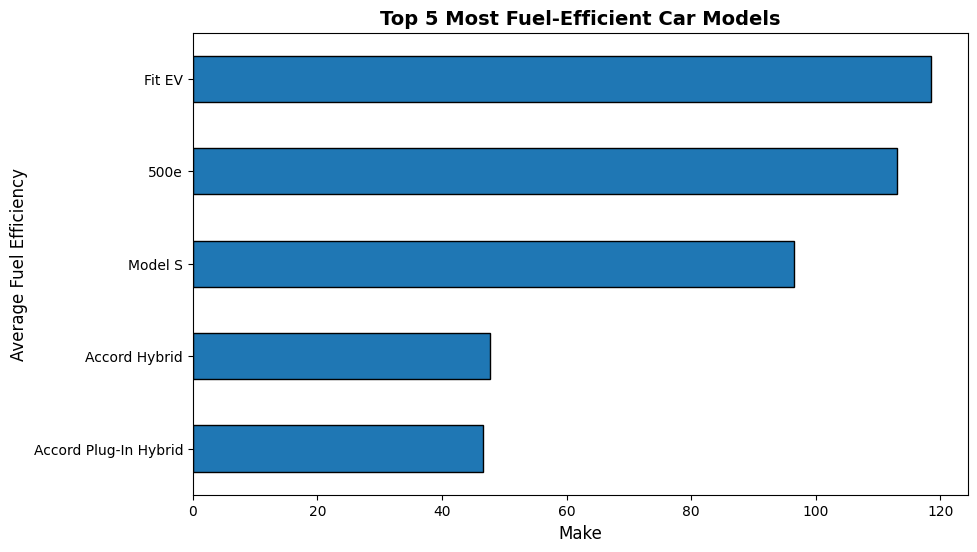

In [34]:
#Top 5 Models by Fuel Efficiency
Model_fuel_efficient = cars_df[cars_df['Make'].isin(fuel_efficient.index)].groupby(['Model'])[['Fuel Efficiency']].mean().sort_values(by='Fuel Efficiency').tail(5)
ax = Model_fuel_efficient.plot(kind = 'barh' , figsize = (10,6) , color=['#1F77B4'],edgecolor='black',legend=False)
plt.title('Top 5 Most Fuel-Efficient Car Models', fontsize=14, fontweight='bold')
plt.ylabel('Average Fuel Efficiency', fontsize=12)
plt.xlabel('Make', fontsize=12)
ax.set_facecolor('none')           # Make the axes background transparent
ax.figure.set_facecolor('none')    # Make the figure background transparent
plt.show()

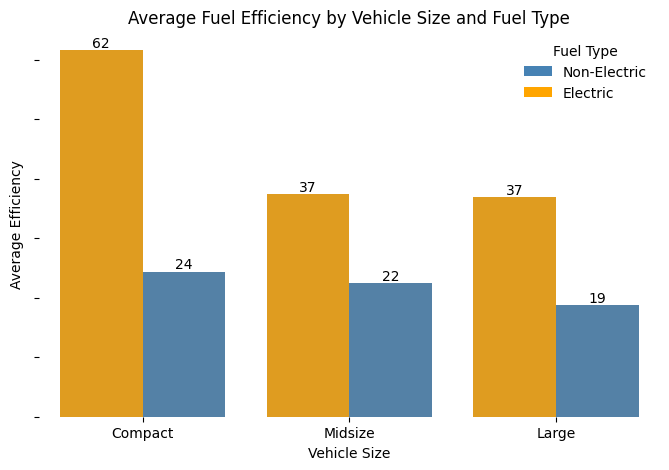

In [35]:
# Fuel Efficiency by vehichle size electric vs non-electric
#  Calculate average Fuel Efficiency by Vehicle Size and Electric type
avg_Fuel_Efficiency = cars_df.groupby(['Vehicle Size', 'Fuel Type'])['Fuel Efficiency'].mean().reset_index()

# Set color palette (orange for electric, blue for non-electric)
colors = {'Electric': 'orange', 'Non-Electric': 'steelblue'}

plt.figure(figsize=(8,5))
order = ['Compact', 'Midsize', 'Large']

ax = sns.barplot(
    data=avg_Fuel_Efficiency,
    x='Vehicle Size',
    y='Fuel Efficiency',
    hue='Fuel Type',
    palette=colors,
    order=order
)

# Custom color legend
legend_elements = [
    Patch(facecolor='steelblue', label='Non-Electric'),
    Patch(facecolor='orange', label='Electric')
]
plt.legend(handles=legend_elements, title='Fuel Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.f')
ax.set_yticklabels([])
ax.set_facecolor('none')           # Make the axes background transparent
ax.figure.set_facecolor('none')    # Make the figure background transparent
plt.title('Average Fuel Efficiency by Vehicle Size and Fuel Type')
plt.xlabel('Vehicle Size')
plt.ylabel('Average Efficiency')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.legend(handles=legend_elements, title='Fuel Type', frameon=False)

plt.show()

In [ ]:
#Creating a new variable for luxury cars only
cars_df_luxury = cars_df[cars_df['Luxury'] == True]

In [ ]:
#Creating a new variable for non-luxury cars only
cars_df_not_luxury = cars_df[cars_df['Luxury'] == False]

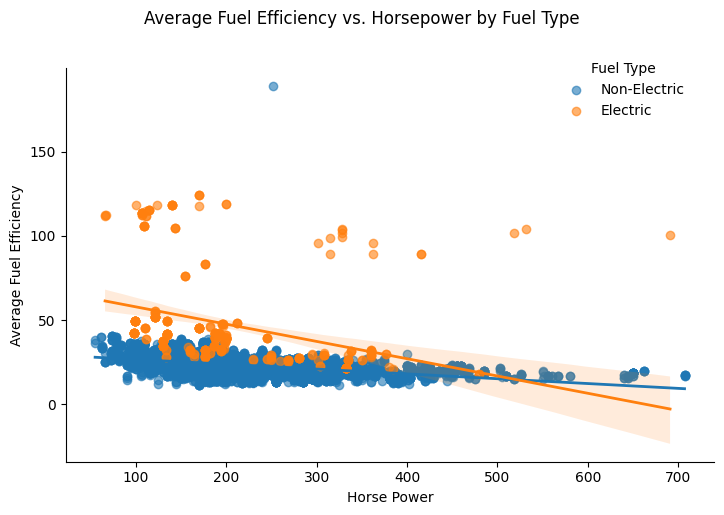

In [43]:
# Fuel Efficiency vs. Horsepower by Fuel Type (Non-Luxury)
g = sns.lmplot(
    data=cars_df_not_luxury,
    x='Engine HP',
    y='Fuel Efficiency',
    hue='Fuel Type',
    scatter_kws={'alpha':0.6},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.2
)

g.fig.suptitle('Average Fuel Efficiency vs. Horsepower by Fuel Type', y=1.02)
g.set_xlabels('Horse Power')
g.set_ylabels('Average Fuel Efficiency')

# Move the existing legend (no plt.legend()!)
g._legend.set_bbox_to_anchor((0.95, 0.85))
g._legend.set_title('Fuel Type')
g.fig.patch.set_facecolor('none')             # Transparent figure background
g.ax.set_facecolor('none')                    # Transparent axes background

plt.tight_layout()
plt.show()


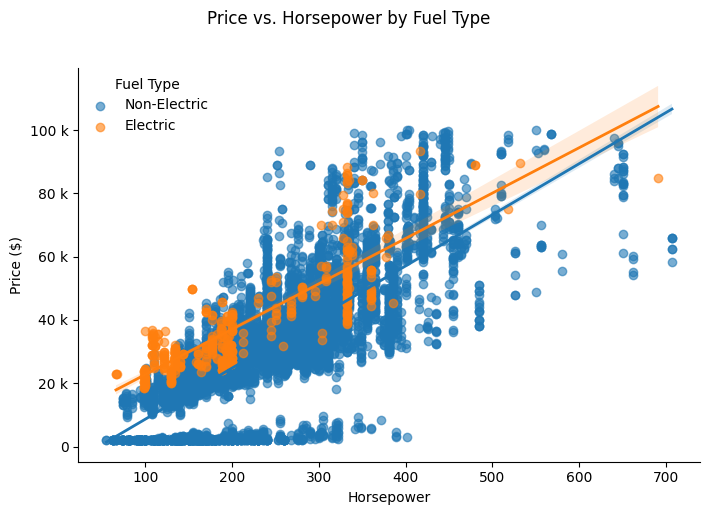

In [44]:
# Fuel Efficiency vs. Horsepower by Fuel Type (Non-Luxury)
g = sns.lmplot(
    data=cars_df_not_luxury,
    x='Engine HP',
    y='Price',
    hue='Fuel Type',
    scatter_kws={'alpha':0.6},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.2
)

g.fig.suptitle('Price vs. Horsepower by Fuel Type', y=1.02)
g.set_xlabels('Horsepower')
g.set_ylabels('Price ($)')

# Move the existing legend (no plt.legend()!)
g._legend.set_bbox_to_anchor((0.95, 0.85))
g._legend.set_title('Fuel Type')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(EngFormatter())
g.fig.patch.set_facecolor('none')             # Transparent figure background
g.ax.set_facecolor('none')                    # Transparent axes background
g._legend.get_frame().set_facecolor('none')
g._legend.get_frame().set_edgecolor('none')
g._legend.set_bbox_to_anchor((0.1, .9))   # x < 0 moves it left of plot
g._legend.set_title('Fuel Type')
g._legend._loc = 2   # upper left corner inside the axes (optional)
plt.show()


In [45]:
cars_df_not_luxury.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'Price',
       'highway Fuel Efficiency', 'Luxury', 'Fuel Efficiency', 'Fuel Type'],
      dtype='object')

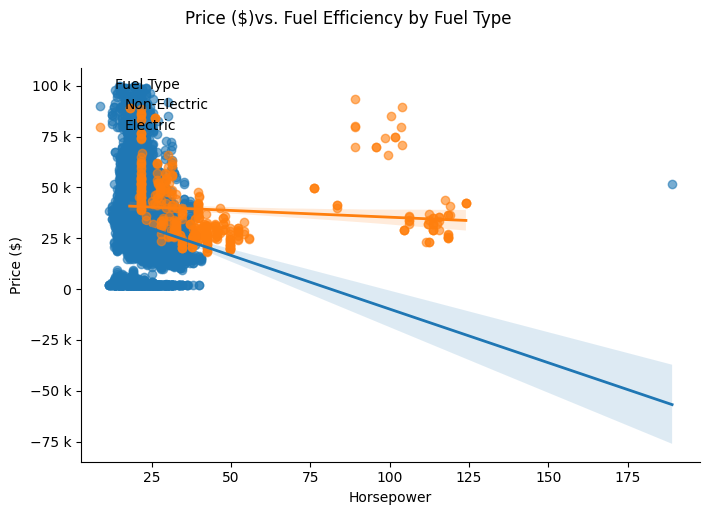

In [46]:
# Fuel Efficiency vs. Horsepower by Fuel Type (Non-Luxury)
g = sns.lmplot(
    data=cars_df_not_luxury,
    x='Fuel Efficiency',
    y='Price',
    hue='Fuel Type',
    scatter_kws={'alpha':0.6},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.2
)

g.fig.suptitle('Price ($)vs. Fuel Efficiency by Fuel Type', y=1.02)
g.set_xlabels('Horsepower')
g.set_ylabels('Price ($)')

# Move the existing legend (no plt.legend()!)
g._legend.set_bbox_to_anchor((0.95, 0.85))
g._legend.set_title('Fuel Type')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(EngFormatter())
g.fig.patch.set_facecolor('none')             # Transparent figure background
g.ax.set_facecolor('none')                    # Transparent axes background
g._legend.get_frame().set_facecolor('none')
g._legend.get_frame().set_edgecolor('none')
g._legend.set_bbox_to_anchor((-5, .9))   # x < 0 moves it left of plot
g._legend.set_title('Fuel Type')
g.fig.patch.set_facecolor('none')             # Transparent figure background
g.ax.set_facecolor('none')                    # Transparent axes background
g._legend.get_frame().set_facecolor('none')
g._legend.get_frame().set_edgecolor('none')
g._legend.set_bbox_to_anchor((0.1, .9))   # x < 0 moves it left of plot
g._legend._loc = 2   # upper left corner inside the axes (optional)
plt.show()


In [47]:
#Number of electric vs non-electric
print(len(cars_df[cars_df['Fuel Type'] == 'Electric']),len(cars_df[cars_df['Fuel Type'] == 'Non-Electric']))

403 10796


Text(0.5, 1.0, 'Horsepower vs. Years')

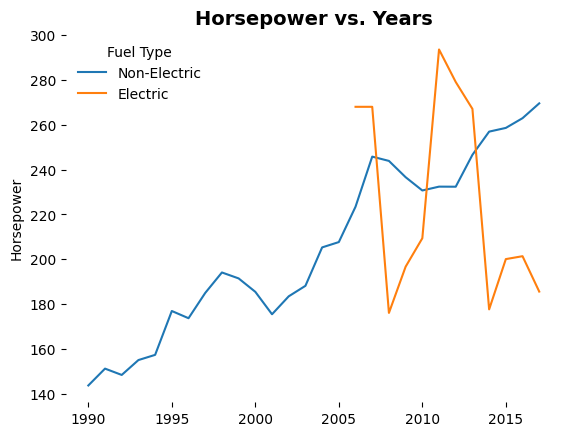

In [48]:
# Adding hue as "event" column

ax = sns.lineplot(x="Year",
             y="Engine HP",
             hue="Fuel Type",
             errorbar=None,
             data=cars_df_not_luxury)
ax.set_facecolor('none')           # Transparent plot area
ax.figure.set_facecolor('none')    # Transparent figure background
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel(None)
ax.set_ylabel('Horsepower')
ax.grid(False)
legend = ax.get_legend()
legend.get_frame().set_facecolor('none')   # transparent background
legend.get_frame().set_edgecolor('none')   # remove outline
plt.title('Horsepower vs. Years', fontsize=14, fontweight='bold')


In [49]:
#Number of luxury vs non-luxury for electric
print(len(cars_df[(cars_df['Fuel Type'] == 'Electric') & (cars_df['Luxury'] == True)]),len(cars_df[(cars_df['Fuel Type'] == 'Electric') & (cars_df['Luxury'] == False)]))

8 395


In [50]:
#Number of luxury vs non-luxury for non-electric
print(len(cars_df[(cars_df['Fuel Type'] == 'Non-Electric') & (cars_df['Luxury'] == True)]),len(cars_df[(cars_df['Fuel Type'] == 'Non-Electric') & (cars_df['Luxury'] == False)]))

624 10172


In [51]:
#Average Price for electric vs non-electric
print((cars_df[cars_df['Fuel Type'] == 'Electric']['Price'].mean()),cars_df[cars_df['Fuel Type'] == 'Non-Electric']['Price'].mean())

40589.09429280397 41975.82928862542


In [52]:
#Median Price for electric vs non-electric
print((cars_df[cars_df['Fuel Type'] == 'Electric']['Price'].median()),cars_df[cars_df['Fuel Type'] == 'Non-Electric']['Price'].median())

33810.0 30530.0


In [53]:
#Average Fuel Efficiency for electric vs non-electric
print((cars_df[cars_df['Fuel Type'] == 'Electric']['Fuel Efficiency'].mean()),cars_df[cars_df['Fuel Type'] == 'Non-Electric']['Fuel Efficiency'].mean())

46.49007444168735 22.30075954057058


In [54]:
#Number of luxuries cars vs non-luxuries cars
print(len(cars_df[cars_df['Luxury'] == True]),len(cars_df[cars_df['Luxury'] == False]))

632 10567


In [55]:
#Calculating the % difference Fuel Efficiency
avg_electric = cars_df.loc[cars_df['Fuel Type'] == 'Electric', 'Fuel Efficiency'].mean()
avg_nonelectric = cars_df.loc[cars_df['Fuel Type'] == 'Non-Electric', 'Fuel Efficiency'].mean()
percent_higher = ((avg_electric - avg_nonelectric) / avg_nonelectric) * 100
percent_higher

np.float64(108.46856967858174)

In [56]:
percent_lower = ((avg_nonelectric - avg_electric) / avg_electric) * 100
percent_lower

np.float64(-52.03113824104004)

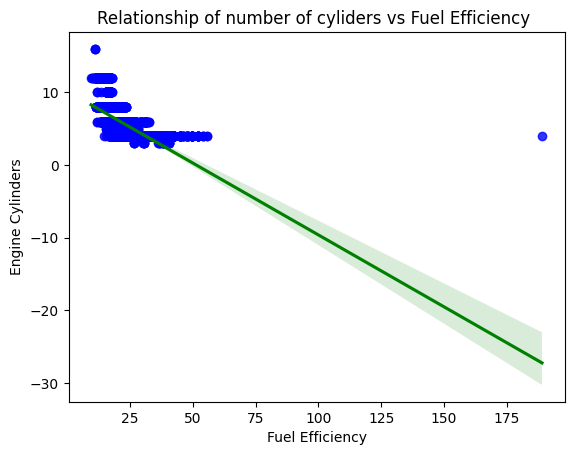

In [57]:
# number of cyliders vs Fuel Efficiency 
# Adding colors to scatter points & line
zero_cylinder = cars_df[cars_df['Engine Cylinders'] != 0]
sns.regplot(x="Fuel Efficiency",
            y="Engine Cylinders",
            scatter_kws={"color": "blue"},
            line_kws={"color": "green"},
            data=zero_cylinder)
plt.title("Relationship of number of cyliders vs Fuel Efficiency ")
plt.show()

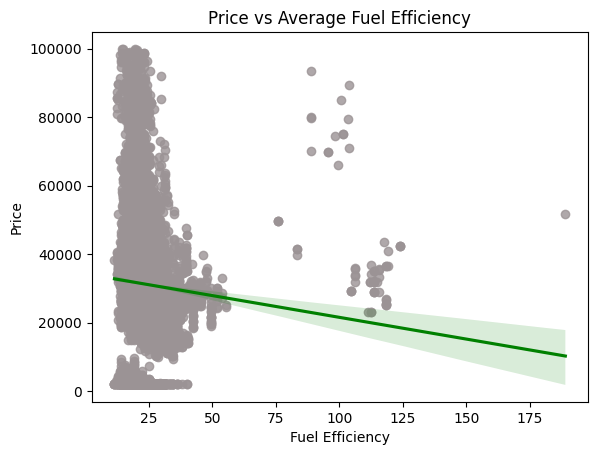

In [ ]:
# Price vs Fuel Efficiency for non-luxury cars
# Adding colors to scatter points & line
sns.regplot(x="Fuel Efficiency",
            y="Price",
            scatter_kws={"color": "#9B9395"},
            line_kws={"color": "green"},
            data=cars_df_not_luxury)
plt.title("Price vs Average Fuel Efficiency")
plt.show()

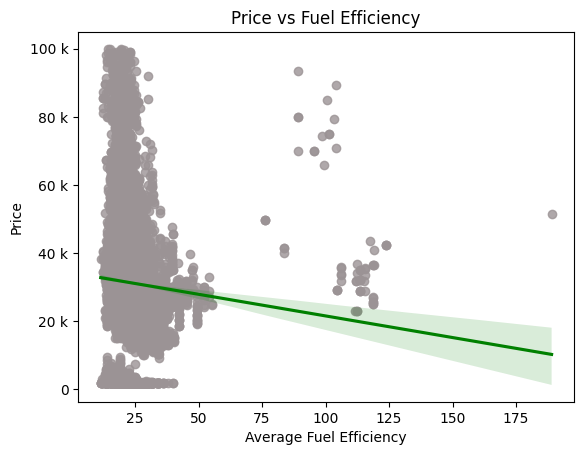

In [ ]:
# Price vs Fuel Efficiency for non-luxury cars
# Adding colors to scatter points & line
sns.regplot(x="Fuel Efficiency",
            y="Price",
            scatter_kws={"color": "#9B9395"},
            line_kws={"color": "green"},
            data=cars_df_not_luxury)
plt.title("Price vs Fuel Efficiency")
plt.xlabel('Average Fuel Efficiency')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.show()

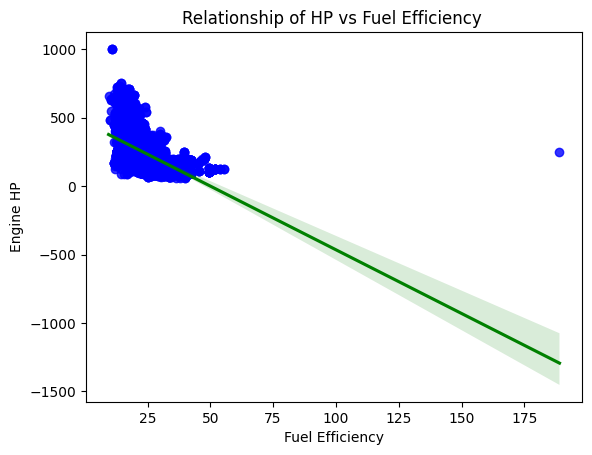

In [58]:
# HP vs Fuel Efficiency 
# Adding colors to scatter points & line
zero_cylinder = cars_df[cars_df['Engine Cylinders'] != 0]
sns.regplot(x="Fuel Efficiency",
            y="Engine HP",
            scatter_kws={"color": "blue"},
            line_kws={"color": "green"},
            data=zero_cylinder)
plt.title("Relationship of HP vs Fuel Efficiency ")
plt.show()

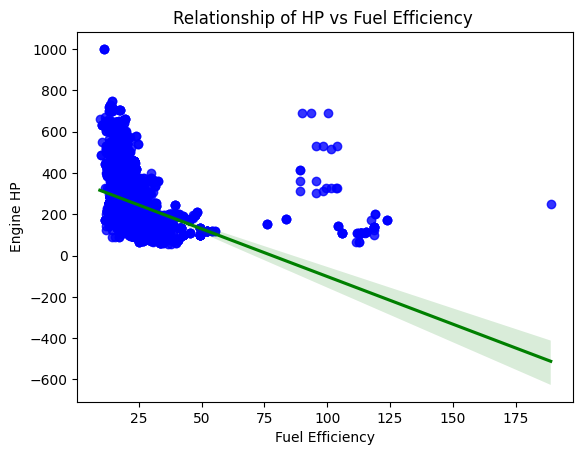

In [59]:
# number of cyliders vs Fuel Efficiency 
# Adding colors to scatter points & line
sns.regplot(x="Fuel Efficiency",
            y="Engine HP",
            scatter_kws={"color": "blue"},
            line_kws={"color": "green"},
            data=cars_df)
plt.title("Relationship of HP vs Fuel Efficiency ")
plt.show()

<Axes: >

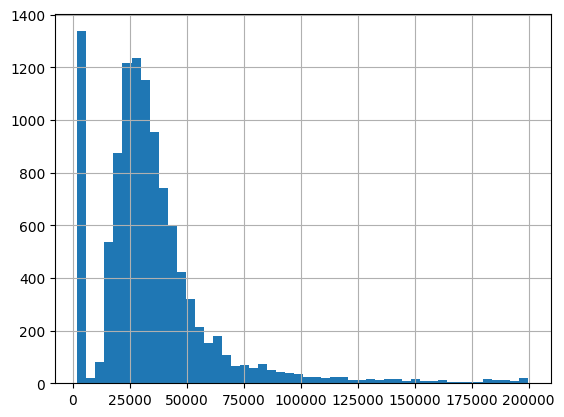

In [60]:
cars_df[cars_df['Price'] < 200000]['Price'].hist(bins=50)

Text(0.5, 1.0, 'Price Distribution')

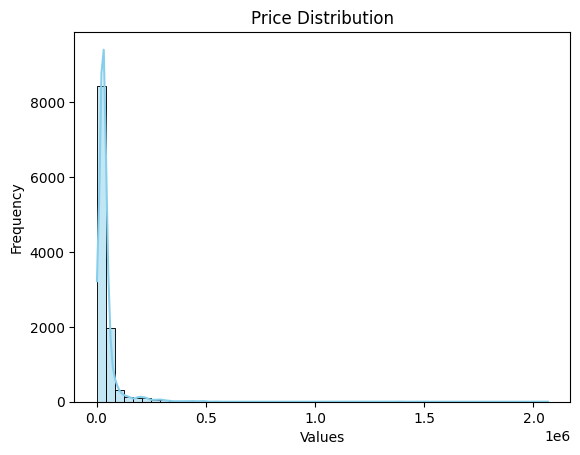

In [61]:
numbers = cars_df[cars_df['Price'] < 20000000]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')


Text(0.5, 1.0, 'Price Distribution')

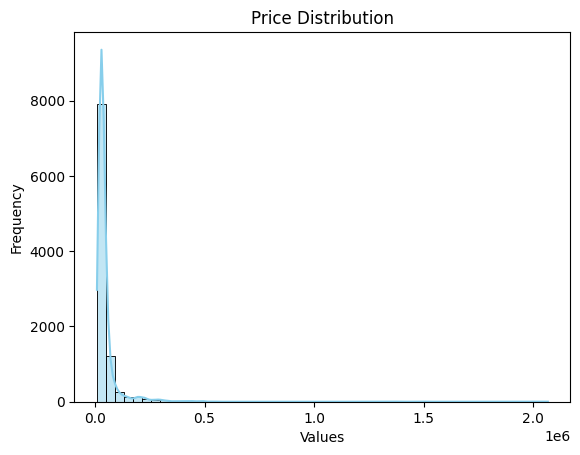

In [62]:
numbers = cars_df[(cars_df['Price'] < 20000000) & (cars_df['Year'] > 2000)]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')

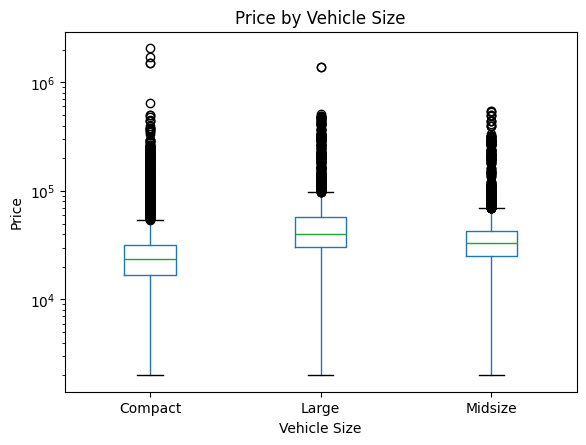

In [63]:
cars_df.boxplot(column='Price', by='Vehicle Size')
plt.title("Price by Vehicle Size")
plt.suptitle('')  # remove the automatic "Group by" title
plt.xlabel("Vehicle Size")
plt.ylabel("Price")
plt.grid(False)
plt.yscale("log")
plt.show()

Text(0.5, 1.0, 'Price Distribution')

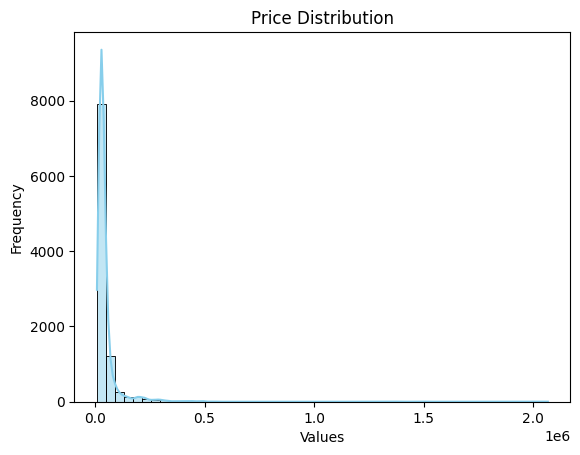

In [64]:
numbers = cars_df[(cars_df['Price'] < 20000000) & (cars_df['Year'] > 2000)]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution')

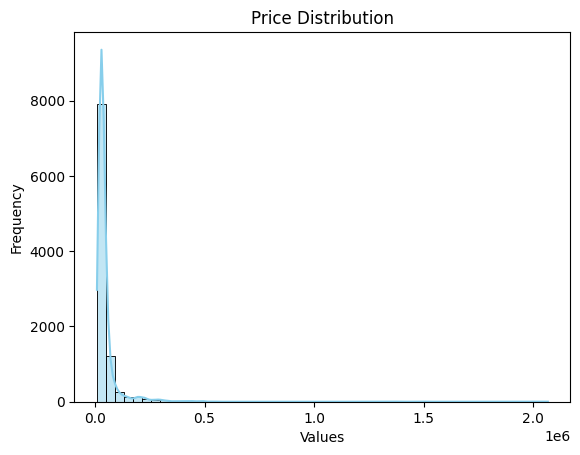

In [65]:
numbers = cars_df[(cars_df['Price'] < 20000000) & (cars_df['Year'] > 2000)]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution')

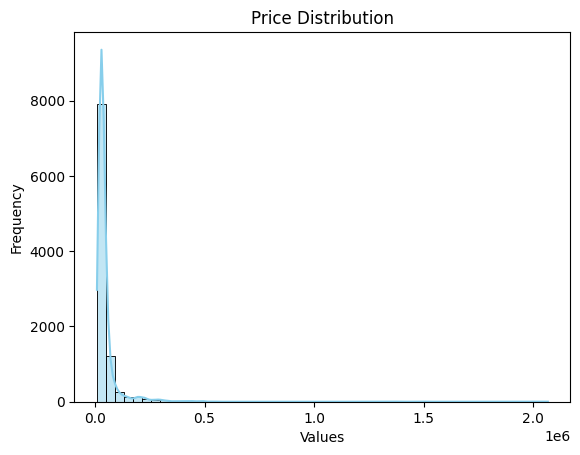

In [66]:
numbers = cars_df[(cars_df['Price'] < 20000000) & (cars_df['Year'] > 2000)]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price Distribution')

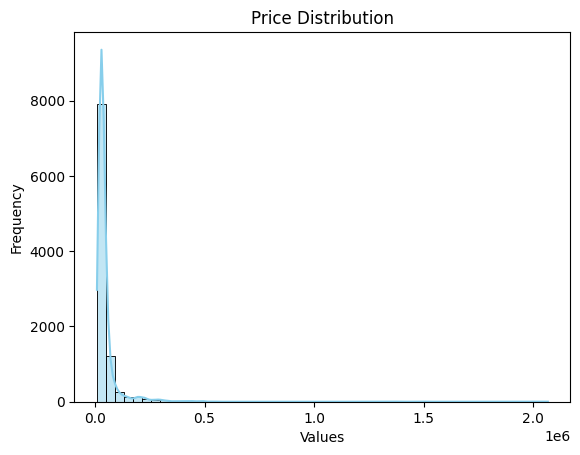

In [67]:
numbers = cars_df[(cars_df['Price'] < 20000000) & (cars_df['Year'] > 2000)]['Price']
sns.histplot(numbers,bins=50, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Distribution')

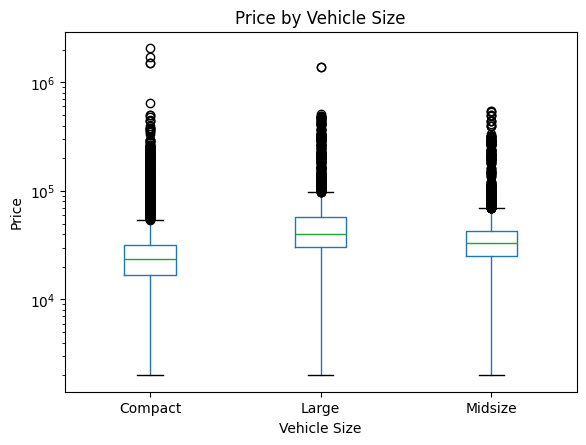

In [68]:
cars_df.boxplot(column='Price', by='Vehicle Size')
plt.title("Price by Vehicle Size")
plt.suptitle('')  # remove the automatic "Group by" title
plt.xlabel("Vehicle Size")
plt.ylabel("Price")
plt.grid(False)
plt.yscale("log")
plt.show()

<Axes: >

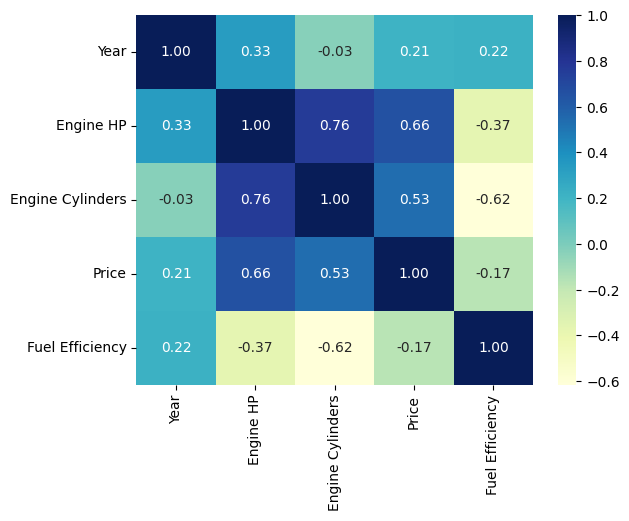

In [69]:
# mask = np.triu(np.ones_like(cars_df1['Year','Engine HP','Engine Cylinders','Popularity','Price','Fuel Efficiency'], dtype=bool))
sns.heatmap(cars_df1.corr(numeric_only=True),fmt=".2f", cmap="YlGnBu", annot=True)

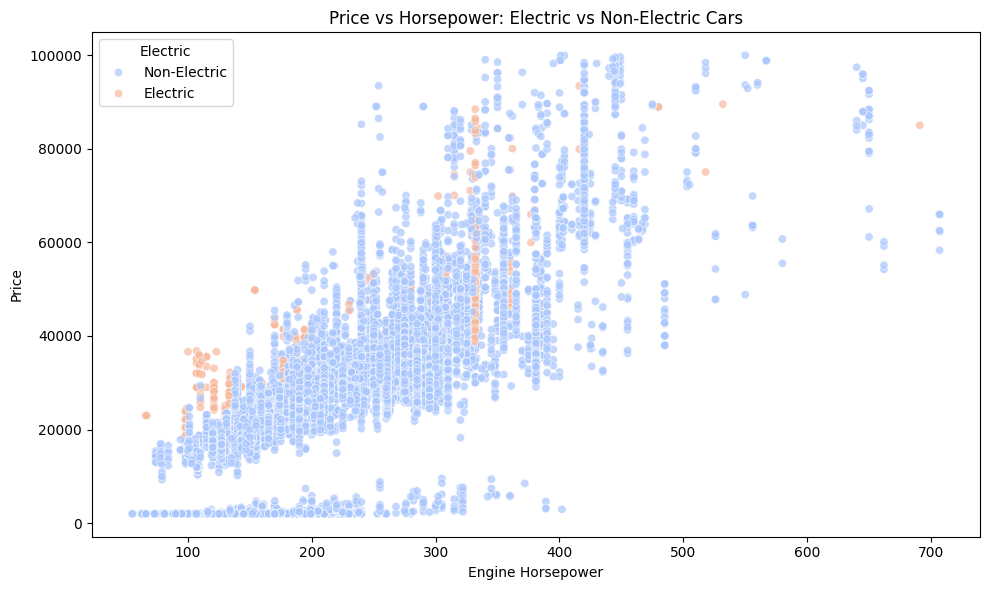

In [70]:
# Q4 : Price Vs HP for luxury cars only
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cars_df_not_luxury ,
    x='Engine HP',
    y='Price',
    hue='Fuel Type',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Price vs Horsepower: Electric vs Non-Electric Cars')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price')
plt.legend(title='Electric')
plt.tight_layout() 
plt.show()

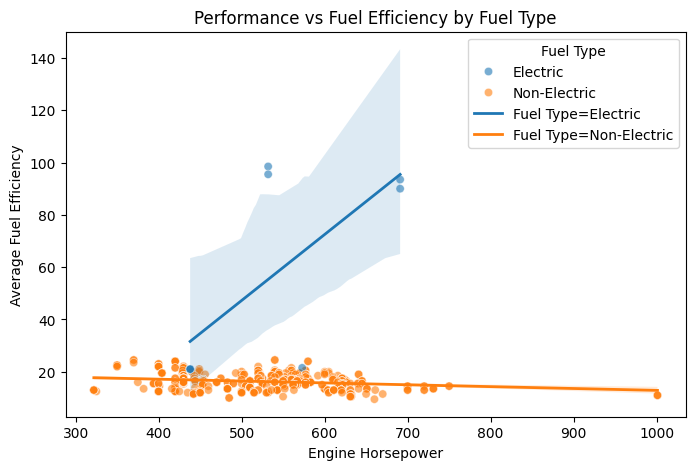

In [71]:
# Fuel Efficiency vs HP luxury cars
plt.figure(figsize=(8,5))
sns.scatterplot(data=cars_df_luxury, x='Engine HP', y='Fuel Efficiency', hue='Fuel Type', alpha=0.6)

# Loop over each group and add its own regression line
for val, subset in cars_df_luxury.groupby('Fuel Type'):
    sns.regplot(
        data=subset,
        x='Engine HP',
        y='Fuel Efficiency',
        scatter=False,
        label=f'Fuel Type={val}',
        line_kws={'linewidth':2}
    )

plt.title('Performance vs Fuel Efficiency by Fuel Type')
plt.xlabel('Engine Horsepower')
plt.ylabel('Average Fuel Efficiency')
plt.legend(title='Fuel Type')
plt.show()

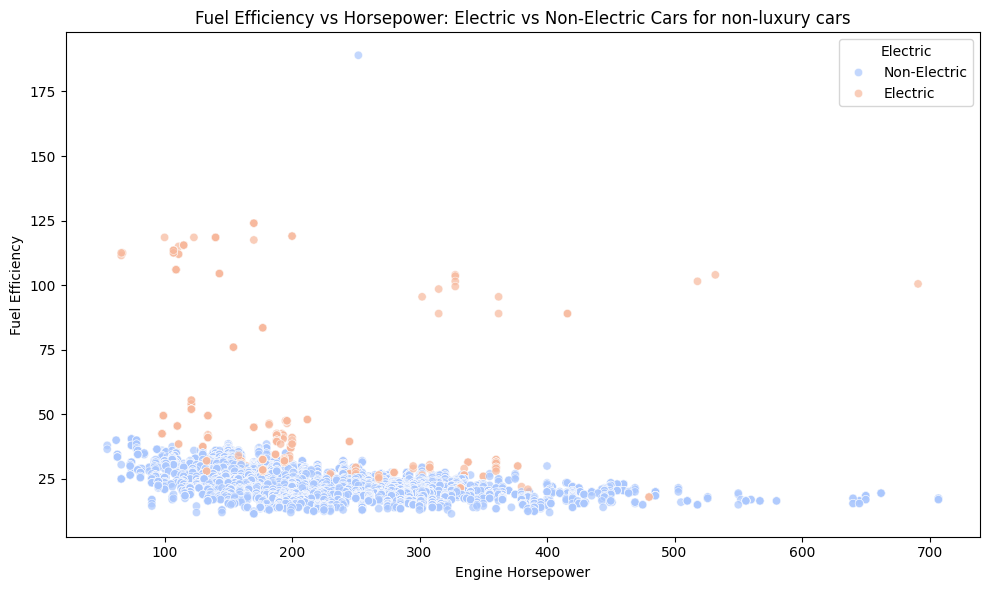

In [72]:
# Q3 : Fuel Efficiency vs Hp non-luxury cars
cars_df_not_luxury = cars_df[cars_df['Luxury'] == False]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cars_df_not_luxury ,
    x='Engine HP',
    y='Fuel Efficiency',
    hue='Fuel Type',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Fuel Efficiency vs Horsepower: Electric vs Non-Electric Cars for non-luxury cars')
plt.xlabel('Engine Horsepower')
plt.ylabel('Fuel Efficiency')
plt.legend(title='Electric')
plt.tight_layout() 
plt.show()

<BarContainer object of 0 artists>

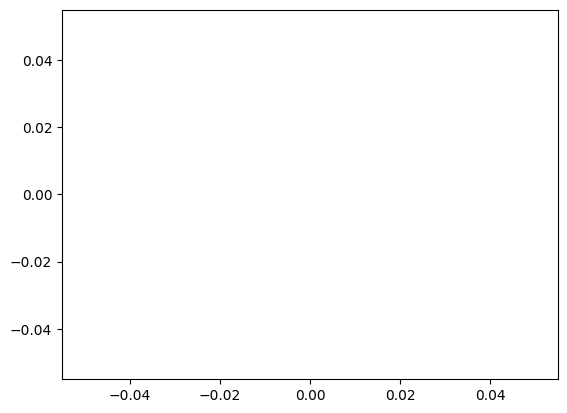

In [73]:
is_electric = cars_df[cars_df['Fuel Type'] == True]
is_not_electric = cars_df[cars_df['Fuel Type'] == False]
plt.bar(is_electric['Vehicle Size'],is_electric['Fuel Efficiency'],color = 'Orange')
plt.bar(is_not_electric['Vehicle Size'],is_not_electric['Fuel Efficiency'],color = 'Blue')

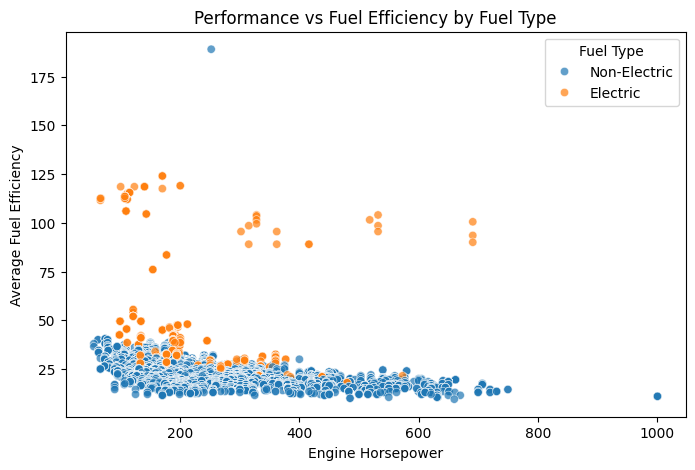

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cars_df, x='Engine HP', y='Fuel Efficiency', hue='Fuel Type', alpha=0.7)
plt.title('Performance vs Fuel Efficiency by Fuel Type')
plt.xlabel('Engine Horsepower')
plt.ylabel('Average Fuel Efficiency')
plt.show()

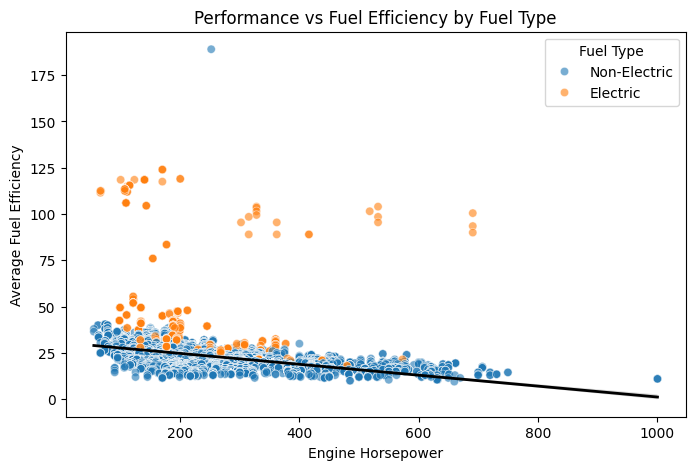

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cars_df, x='Engine HP', y='Fuel Efficiency', hue='Fuel Type', alpha=0.6)
sns.regplot(data=cars_df, x='Engine HP', y='Fuel Efficiency', scatter=False, color='black', line_kws={'linewidth':2})
plt.title('Performance vs Fuel Efficiency by Fuel Type')
plt.xlabel('Engine Horsepower')
plt.ylabel('Average Fuel Efficiency')
plt.show()


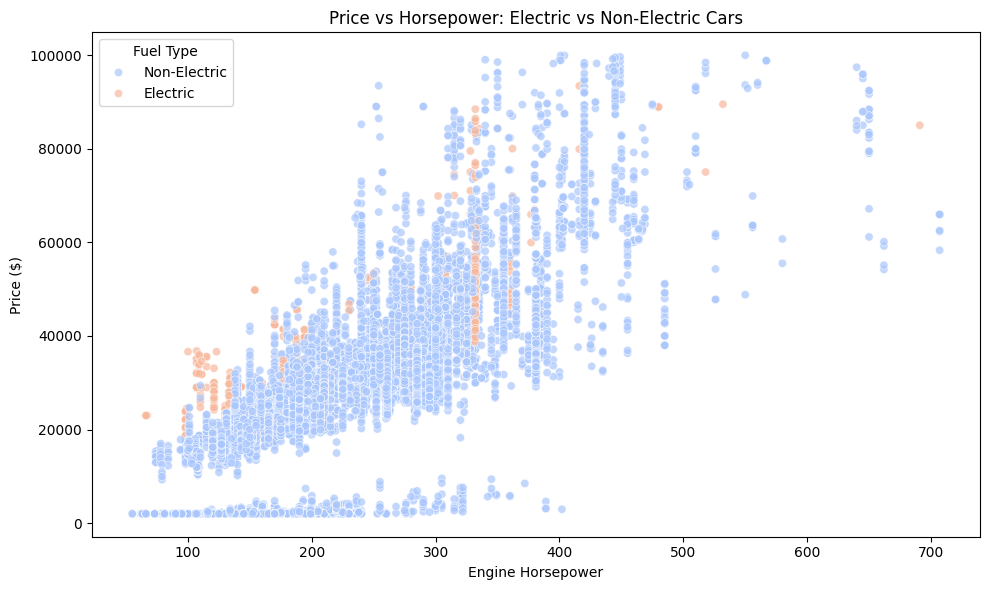

In [76]:
cars_df_not_luxury = cars_df[cars_df['Luxury'] == False]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cars_df_not_luxury ,
    x='Engine HP',
    y='Price',
    hue='Fuel Type',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Price vs Horsepower: Electric vs Non-Electric Cars')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price ($)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

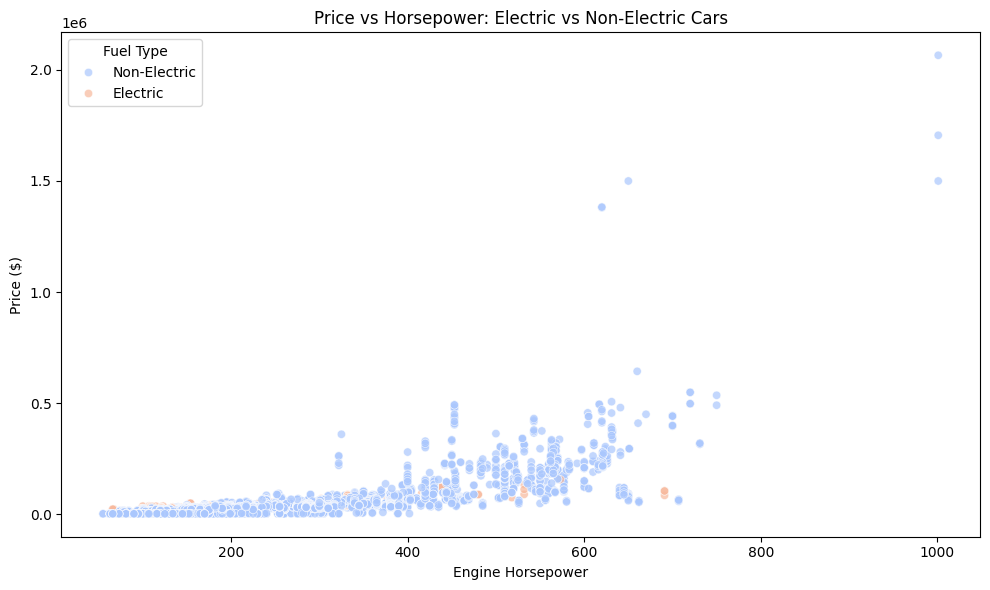

In [77]:
cars_df_luxury = cars_df[cars_df['Luxury'] == True]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cars_df,
    x='Engine HP',
    y='Price',
    hue='Fuel Type',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Price vs Horsepower: Electric vs Non-Electric Cars')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price ($)')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

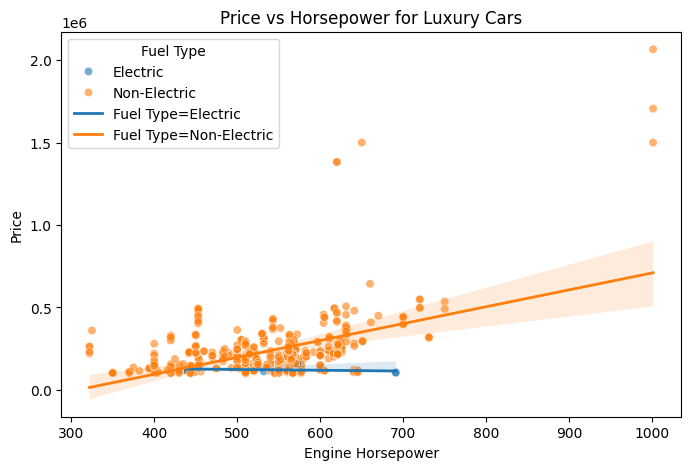

In [78]:
#Q4 : Price Vs HP for luxury cars only
plt.figure(figsize=(8,5))
sns.scatterplot(data=cars_df_luxury, x='Engine HP', y='Price', hue='Fuel Type', alpha=0.6)

# Loop over each group and add its own regression line
for val, subset in cars_df_luxury.groupby('Fuel Type'):
    sns.regplot(
        data=subset,
        x='Engine HP',
        y='Price',
        scatter=False,
        label=f'Fuel Type={val}',
        line_kws={'linewidth':2}
    )

plt.title('Price vs Horsepower for Luxury Cars')
plt.xlabel('Engine Horsepower')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


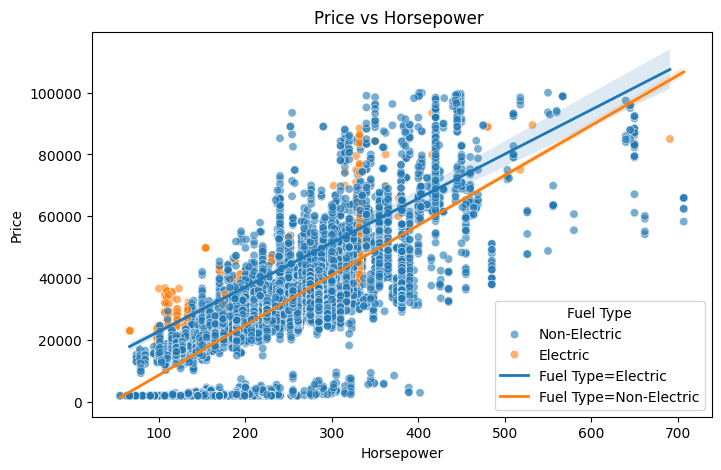

In [79]:
#Q4 : Price Vs HP for luxury cars only
plt.figure(figsize=(8,5))
sns.scatterplot(data=cars_df_not_luxury, x='Engine HP', y='Price', hue='Fuel Type', alpha=0.6)

# Loop over each group and add its own regression line
for val, subset in cars_df_not_luxury.groupby('Fuel Type'):
    sns.regplot(
        data=subset,
        x='Engine HP',
        y='Price',
        scatter=False,
        label=f'Fuel Type={val}',
        line_kws={'linewidth':2}
    )

plt.title('Price vs Horsepower ')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


/var/folders/74/07sh7_g547lgfrnkknv9wdmw0000gn/T/ipykernel_20595/524649798.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero_cylinder = cars_df_not_luxury[cars_df['Engine Cylinders'] != 0]


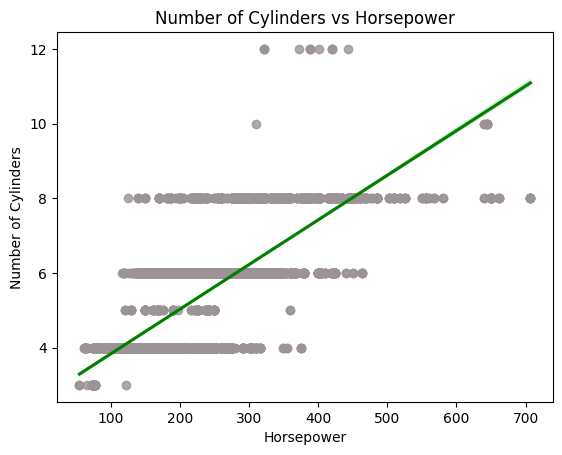

In [ ]:
# number of cyliders vs HP 
# Adding colors to scatter points & line
zero_cylinder = cars_df_not_luxury[cars_df['Engine Cylinders'] != 0]
sns.regplot(x="Engine HP",
            y="Engine Cylinders",
            scatter_kws={"color": "#9B9395"},
            line_kws={"color": "green"},
            data=zero_cylinder)
plt.title("Number of Cylinders vs Horsepower")
plt.xlabel('Horsepower')
plt.ylabel('Number of Cylinders')
plt.show()

/var/folders/74/07sh7_g547lgfrnkknv9wdmw0000gn/T/ipykernel_20595/2888025461.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero_cylinder = cars_df_not_luxury[cars_df['Engine Cylinders'] != 0]


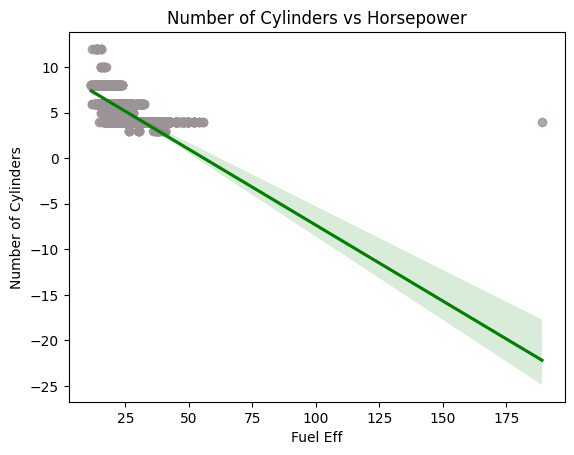

In [ ]:
# number of cyliders vs HP 
# Adding colors to scatter points & line
zero_cylinder = cars_df_not_luxury[cars_df['Engine Cylinders'] != 0]
sns.regplot(x="Fuel Efficiency",
            y="Engine Cylinders",
            scatter_kws={"color": "#9B9395"},
            line_kws={"color": "green"},
            data=zero_cylinder)
plt.title("Number of Cylinders vs Horsepower")
plt.xlabel('Fuel Eff')
plt.ylabel('Number of Cylinders')
plt.show()